#시작

##코랩 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import random

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 데이터 불러오기

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [ ]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


## null 값 확인

In [ ]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [ ]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

## 신용점수와 비교

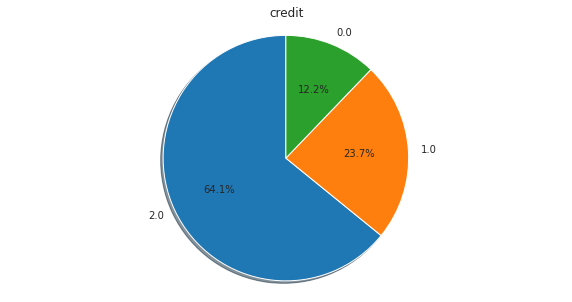

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(train['credit'].value_counts(),labels = train['credit'].value_counts().index,
        autopct='%0.1f%%', shadow = True, startangle=90) 
plt.title("credit")
plt.axis('equal')
plt.show()

In [ ]:
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

In [ ]:
train_1['gender'].value_counts().index

Index(['F', 'M'], dtype='object')

In [ ]:
train_2['gender'].value_counts().index

Index(['F', 'M'], dtype='object')

In [ ]:
def chart(feature):

  sns.set_style('whitegrid')

  plt.figure(figsize = (17,10))

  p1 = plt.subplot(1,3,1)
  sns.countplot(x= feature,  data= train_0, order = train_1[feature].value_counts().index)
  plt.title("credit_0")

  p2 = plt.subplot(1,3,2)
  sns.countplot(x= feature,    data= train_1,order = train_1[feature].value_counts().index)
  plt.title("credit_1")

  p3 = plt.subplot(1,3,3)
  sns.countplot(x= feature,   data= train_2, order = train_1[feature].value_counts().index)
  plt.title("credit_2")

  

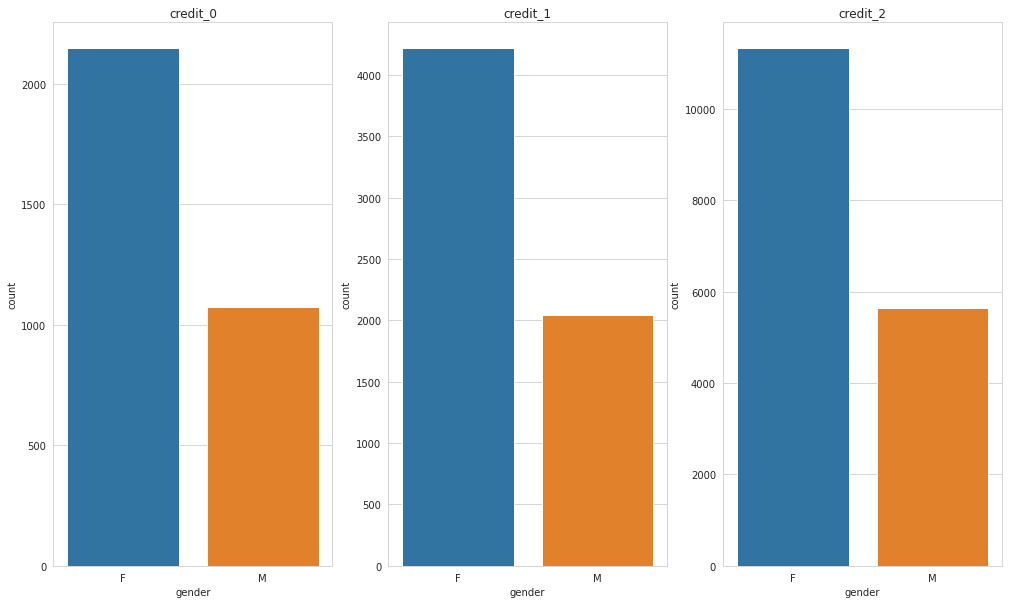

In [ ]:
#성별
chart('gender')

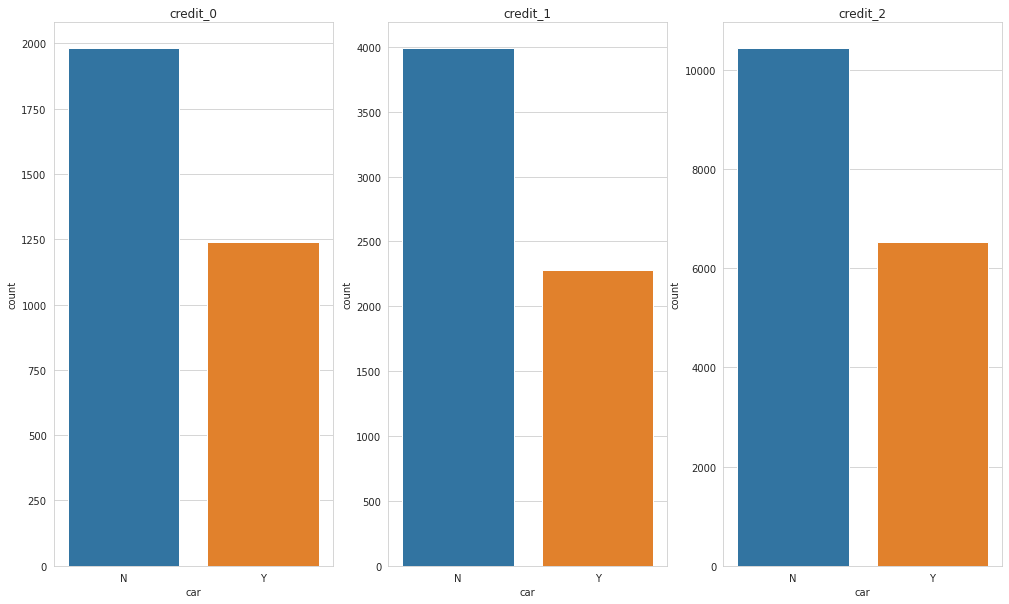

In [ ]:
#자동차 소유 유무
chart('car')

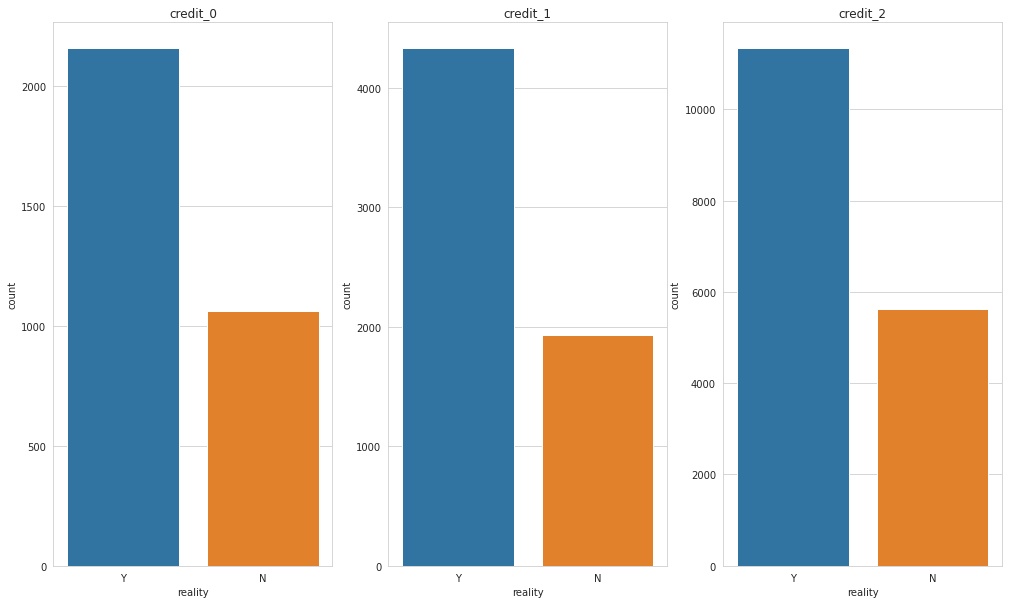

In [ ]:
#부동산 소유 여부
chart('reality')

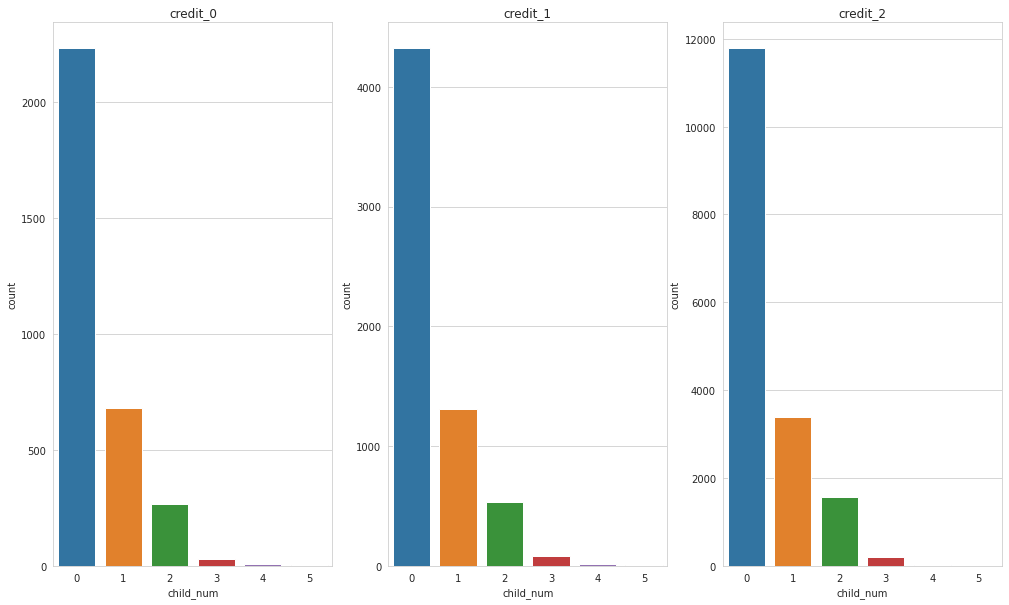

In [ ]:
# 자녀 수
chart('child_num')

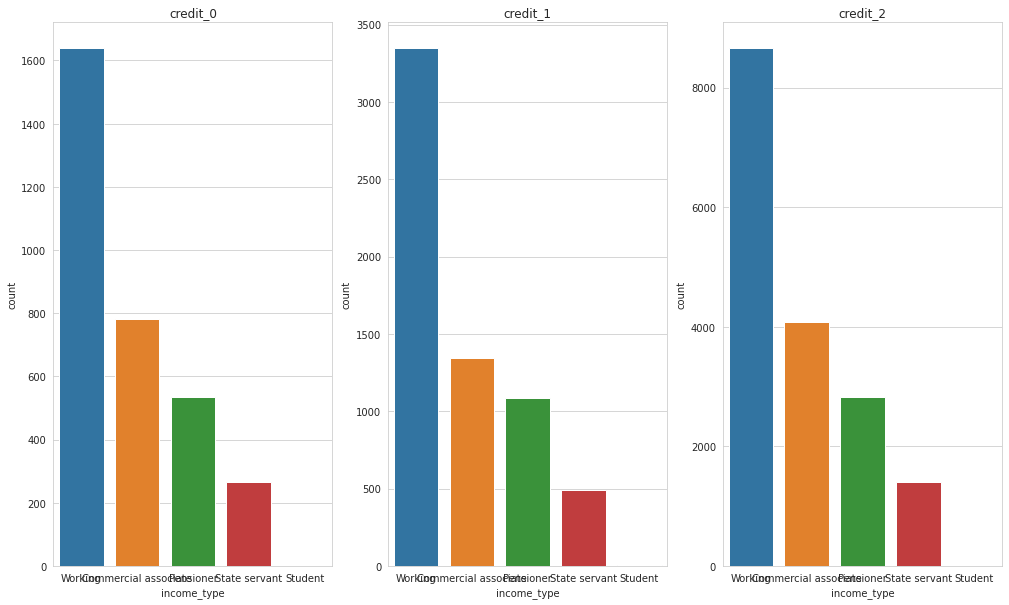

In [ ]:
# 소득 유형
chart('income_type')

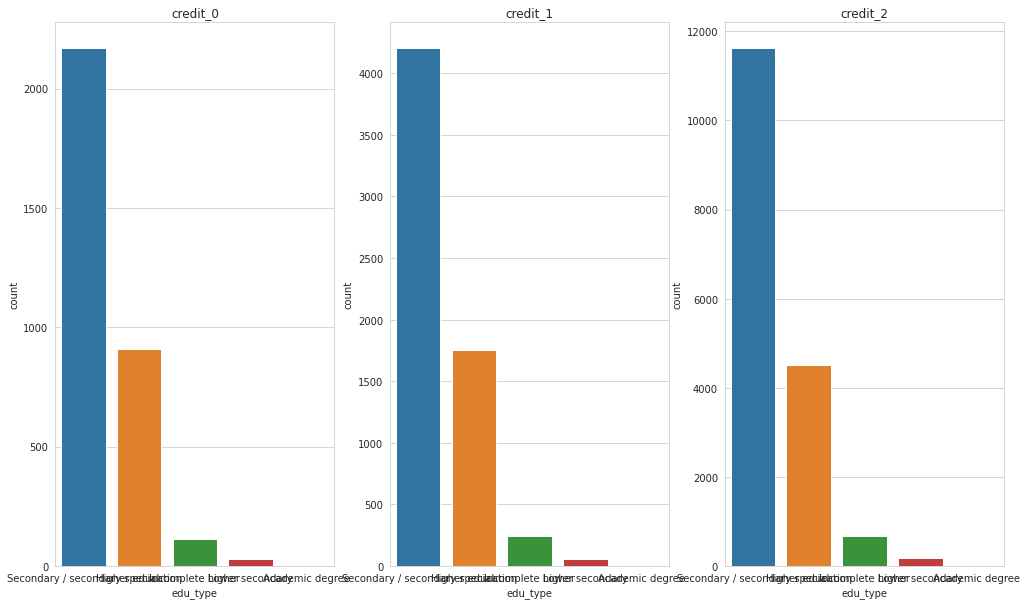

In [ ]:
# 교육 유형
chart('edu_type')

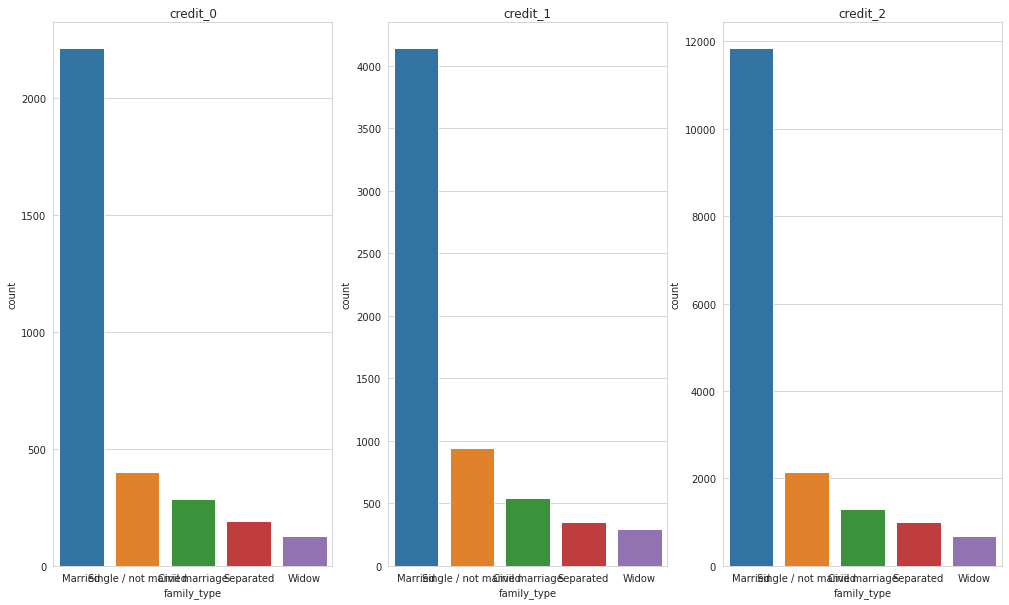

In [ ]:
# 가족 유형
chart('family_type')

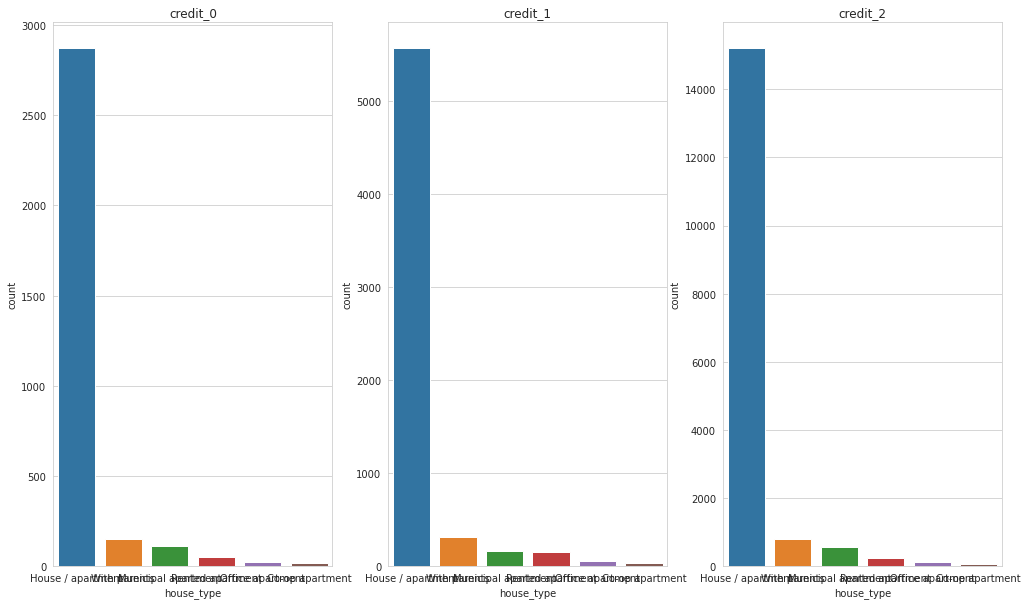

In [ ]:
# 거주 유형
chart('house_type')

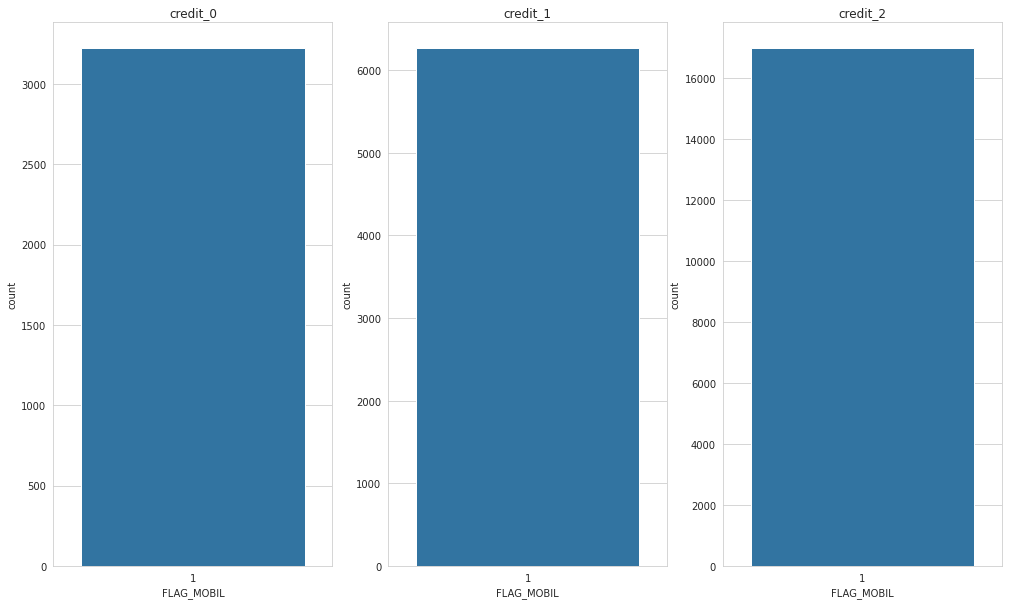

In [ ]:
# 휴대폰
chart('FLAG_MOBIL')

# 이 결과로 보면 휴대폰은 모두 가지고 있음

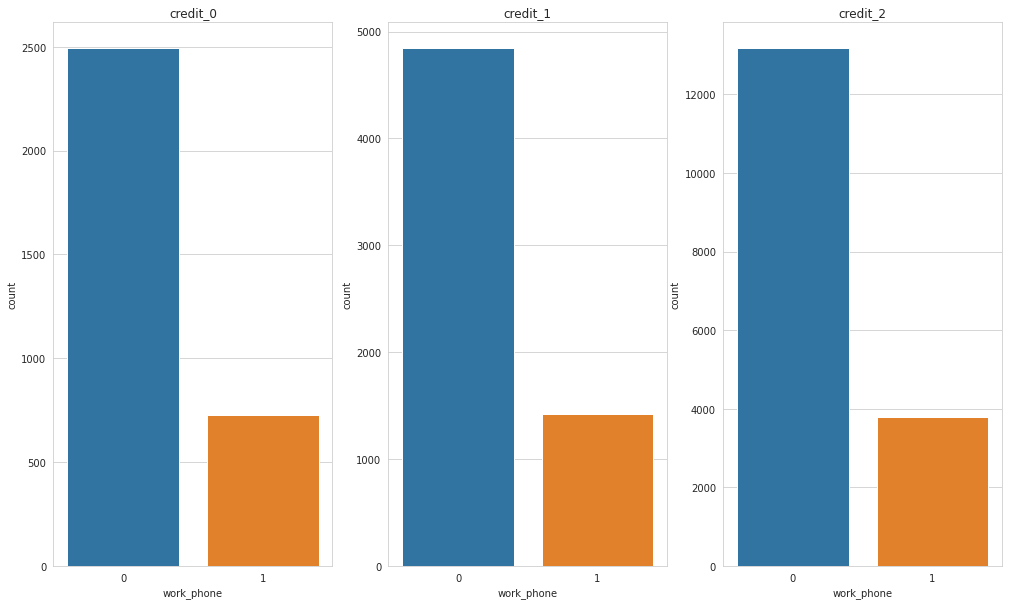

In [ ]:
# 업무용 휴대폰
chart('work_phone')

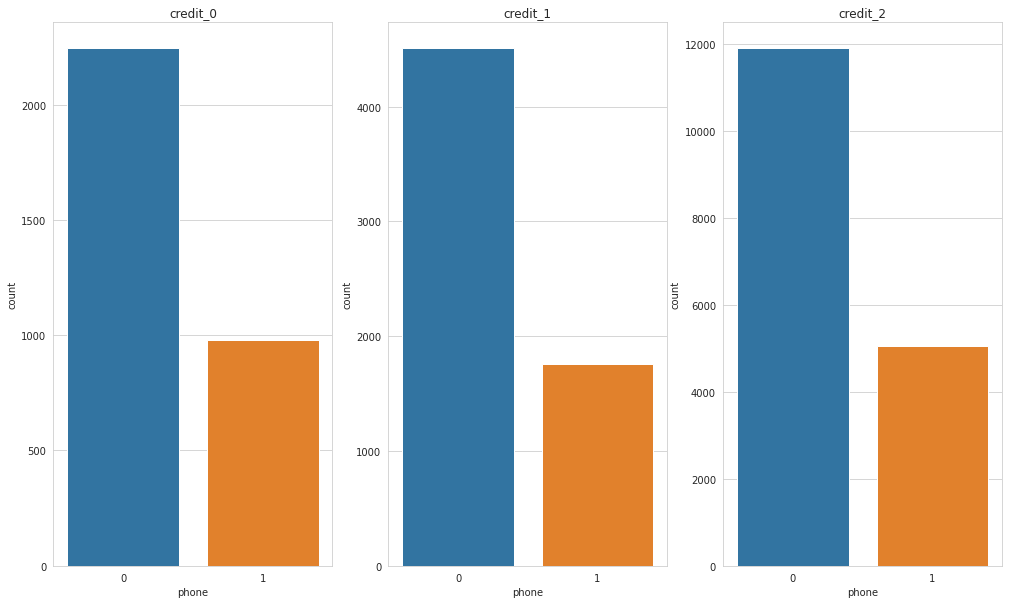

In [ ]:
# 가정용 전화기
chart('phone')

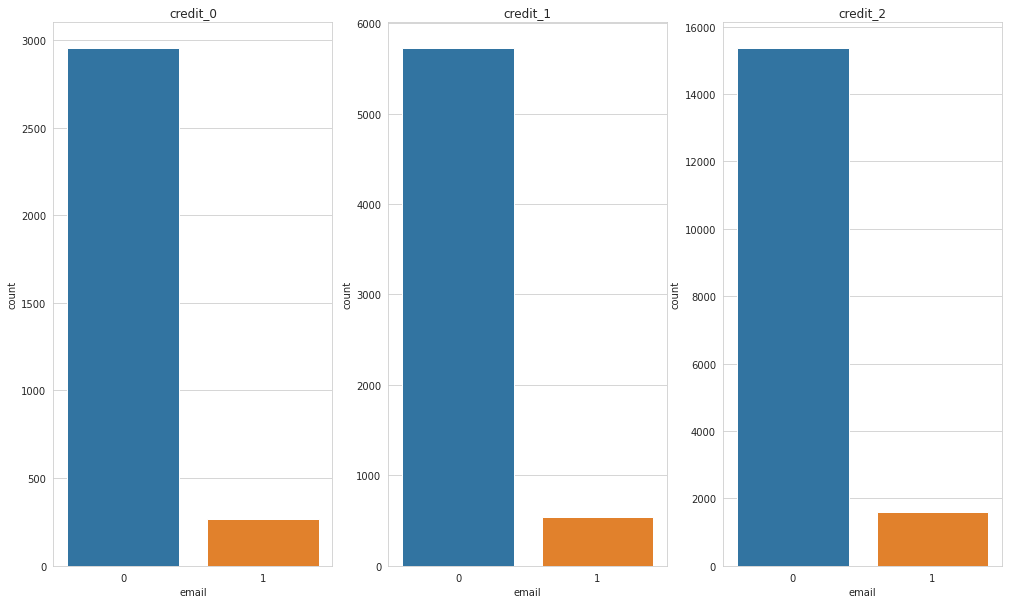

In [ ]:
# 이메일
chart('email')

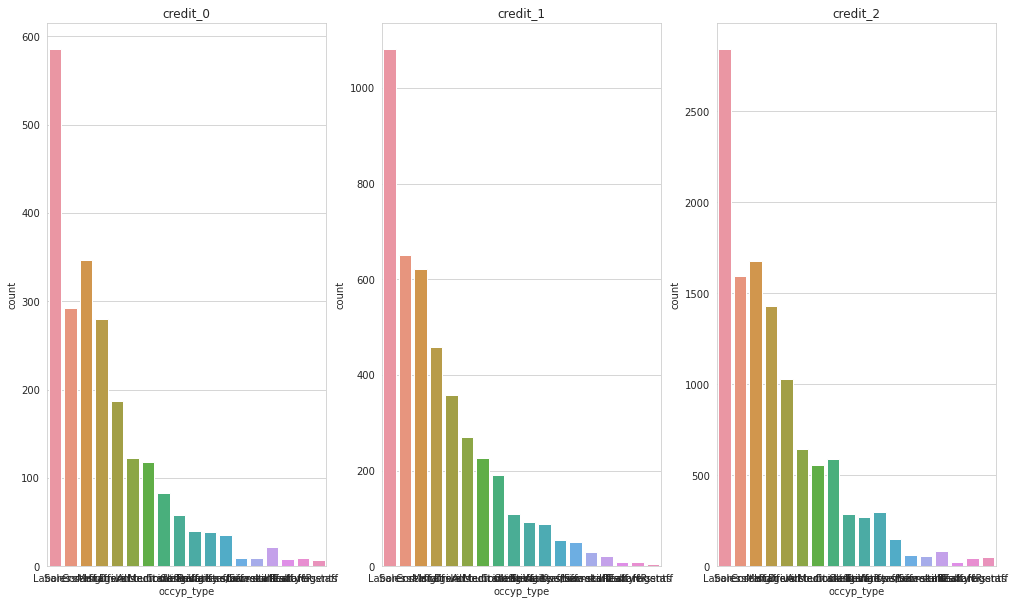

In [ ]:
chart('occyp_type')

# 유형이 많아 보기 힘듬

Text(0.5, 1.0, 'credit_2')

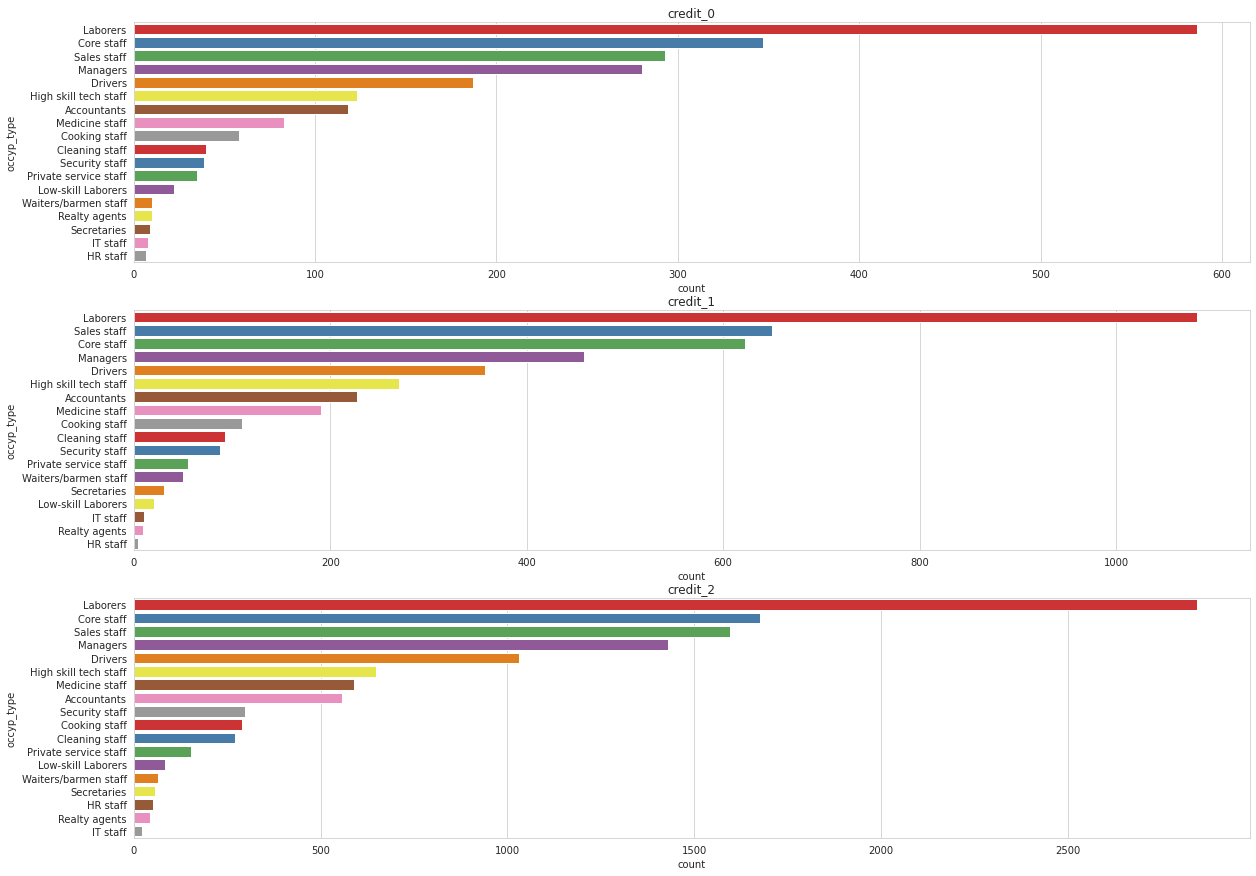

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize = (20,15))

p1 = plt.subplot(3,1,1)
graph1 = sns.countplot(y= train_0['occyp_type'],  palette='Set1', data= train_0, order = train_0['occyp_type'].value_counts().index)
plt.title("credit_0")

p2 = plt.subplot(3,1,2)
graph2 = sns.countplot(y= train_1['occyp_type'], palette='Set1',  data= train_1, order = train_1['occyp_type'].value_counts().index)
plt.title("credit_1")

p3 = plt.subplot(3,1,3)
graph3 = sns.countplot(y= train_2['occyp_type'],  palette='Set1',  data= train_2, order = train_2['occyp_type'].value_counts().index)
plt.title("credit_2")

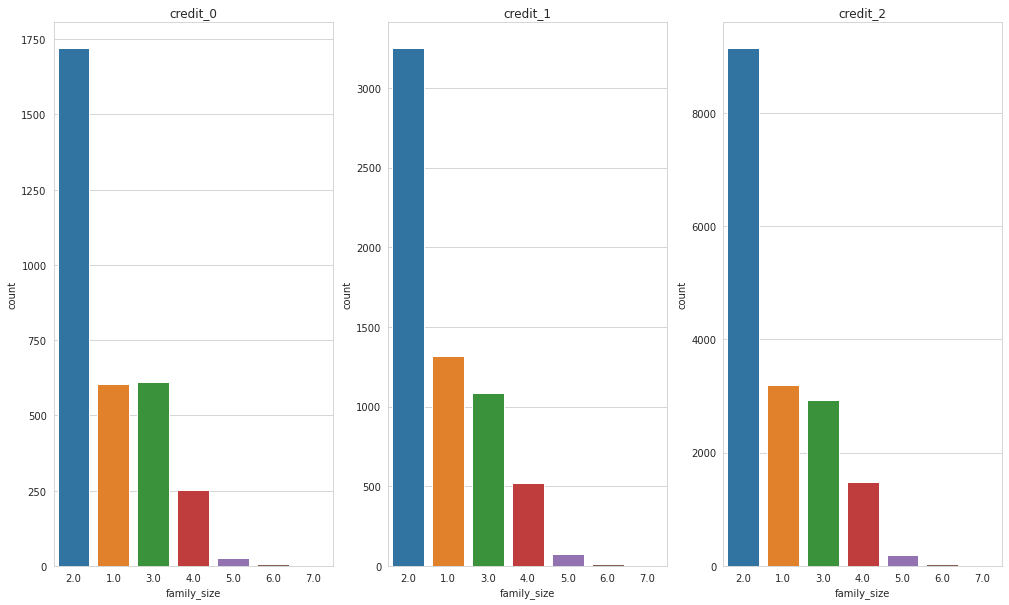

In [ ]:
# 가족 크기
chart('family_size')


```
           

*   이상치들이 종종 존재하여 이상치 제거를 할 필요가 있음
*   휴대폰은 모두다 가지고 있어 의미없으므로 제거할 필요가 있음
*   신용점수 0점과 1점, 2점 모두 비슷한 분포를 가지고 있음

```



## DAYS_BIRTH & drop

In [ ]:
def histo(feature):
  plt.hist(x=train[feature])
  plt.figure(figsize=(17,10))
  plt.show()

In [ ]:
def days_to_age(x):
  return (x*-1)/365

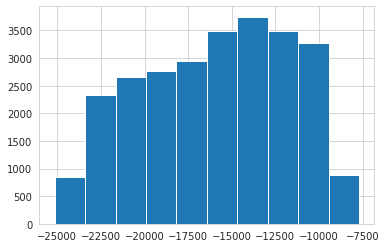

<Figure size 1224x720 with 0 Axes>

In [ ]:
histo('DAYS_BIRTH')

#태어난 날이 그날로부터 -로 찍혀있어 실제 나이로 변환해야함

In [ ]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(days_to_age)
test['DAYS_BIRTH'] = test['DAYS_BIRTH'].apply(days_to_age)

In [ ]:
train['occyp_type'] = train['occyp_type'].fillna('Etc')
test['occyp_type'] = test['occyp_type'].fillna('Etc')

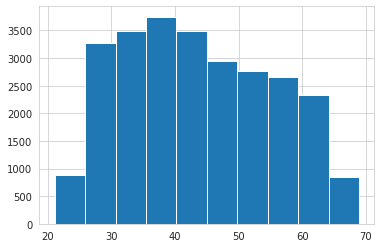

<Figure size 1224x720 with 0 Axes>

In [ ]:
histo('DAYS_BIRTH')

(21.061, 30.67]    4147
(30.67, 40.23]     7246
(40.23, 49.79]     6438
(49.79, 59.35]     5438
(59.35, 68.91]     3188
Name: DAYS_BIRTH, dtype: int64


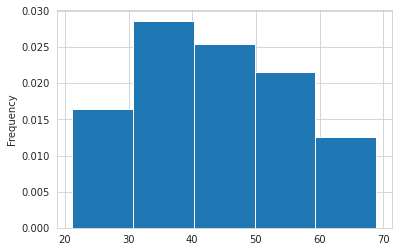

In [ ]:
print(train['DAYS_BIRTH'].value_counts(bins=5,sort=False))
train['DAYS_BIRTH'].plot(kind='hist',bins=5,density=True)

In [ ]:
count, bin_dividers =np.histogram(train['DAYS_BIRTH'], bins=5)
bin_names=[int(i) for i in range(5) ]
train['DAYS_BIRTH']=pd.cut(x=train['DAYS_BIRTH'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [ ]:
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

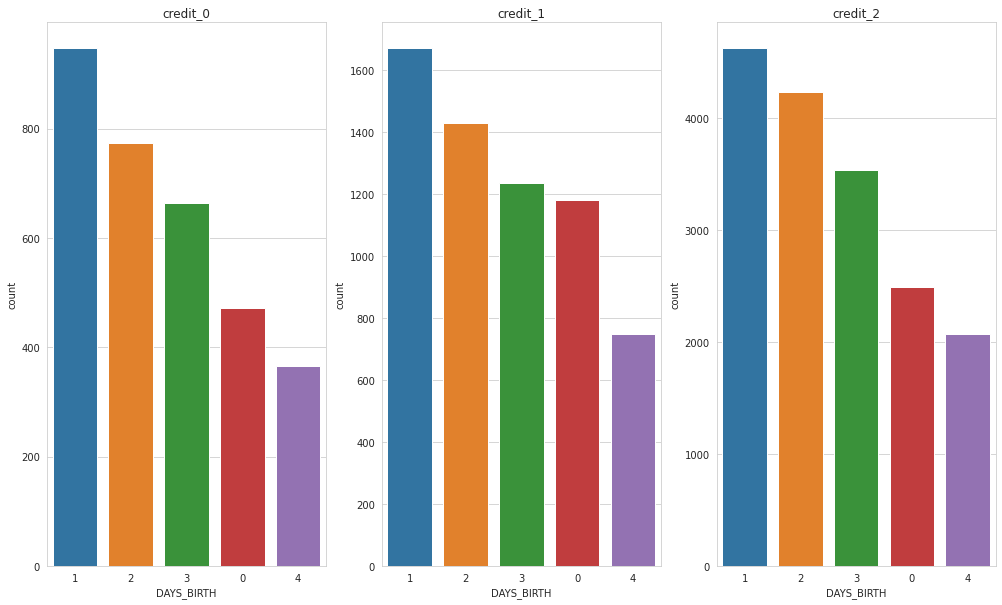

In [ ]:
chart('DAYS_BIRTH')

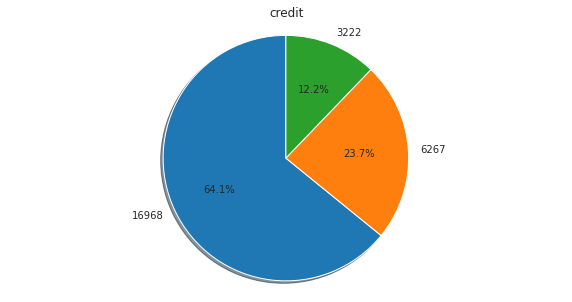

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(train['credit'].value_counts(),labels = train['credit'].value_counts(),
        autopct='%0.1f%%', shadow = True, startangle=90) 
plt.title("credit")
plt.axis('equal')
plt.show()



*   태어난 시점에 따른 신용도 분포는 신용도 0과 1, 2에 각각 유사한 비율로 골고루 분포되어 있음
*   즉, 각 신용 점수에 고루고루 퍼져있다고 볼 수 있음



## DAYS_EMPLOYED

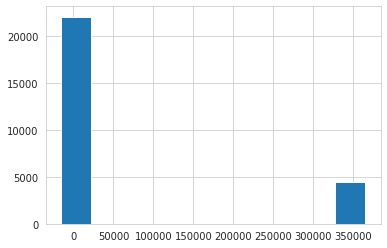

<Figure size 1224x720 with 0 Axes>

In [ ]:
histo('DAYS_EMPLOYED')

In [ ]:
train['DAYS_EMPLOYED'] = -train['DAYS_EMPLOYED']
test['DAYS_EMPLOYED'] = -test['DAYS_EMPLOYED']

In [ ]:
def days_to_year(x):
  return (x/365)

In [ ]:
# 일한 날짜를 연단위로 변환

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(days_to_year)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(days_to_year)

In [ ]:
# 양수값들은 고용되지 않은 상태라 0을 넣었음

train.loc[train['DAYS_EMPLOYED'] < 0, 'DAYS_EMPLOYED'] = -1
test.loc[test['DAYS_EMPLOYED'] < 0 , 'DAYS_EMPLOYED'] = -1

(-1.045, 5.293]     15278
(5.293, 11.586]      7109
(11.586, 17.878]     2378
(17.878, 24.171]     1038
(24.171, 30.464]      446
(30.464, 36.757]      155
(36.757, 43.049]       53
Name: DAYS_EMPLOYED, dtype: int64


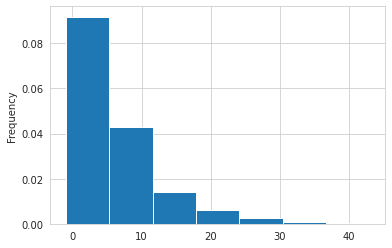

In [ ]:
print(train['DAYS_EMPLOYED'].value_counts(bins=7,sort=False))
train['DAYS_EMPLOYED'].plot(kind='hist',bins=7,density=True)

In [ ]:
count, bin_dividers =np.histogram(train['DAYS_EMPLOYED'], bins=7)
bin_names=[int(i) for i in range(7) ]
train['DAYS_EMPLOYED']=pd.cut(x=train['DAYS_EMPLOYED'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [ ]:
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

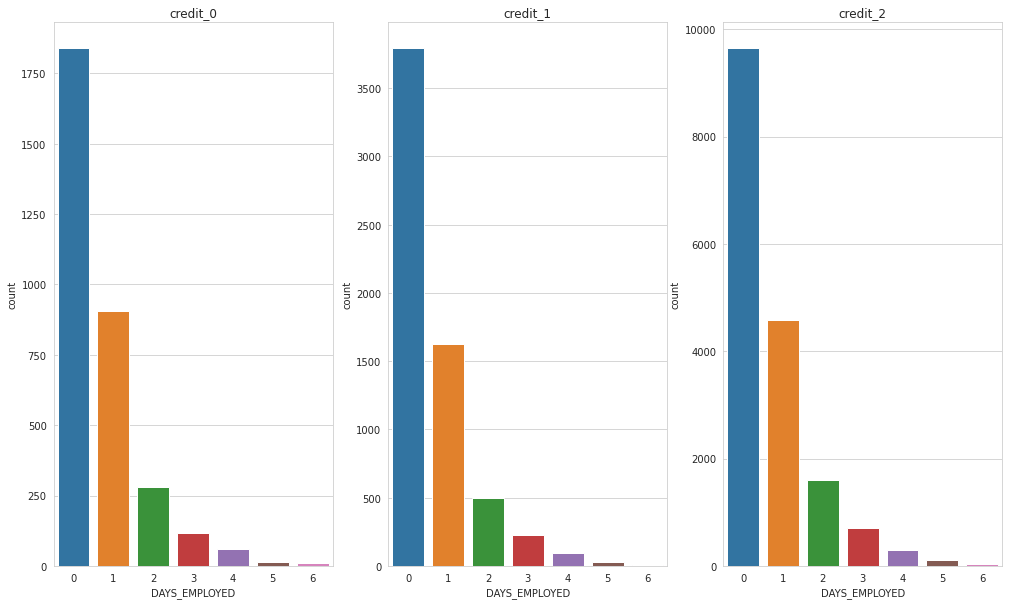

In [ ]:
chart('DAYS_EMPLOYED')

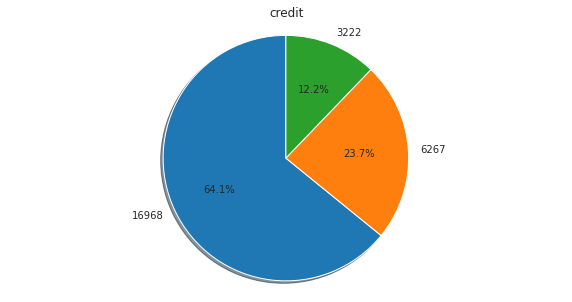

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(train['credit'].value_counts(),labels = train['credit'].value_counts(),
        autopct='%0.1f%%', shadow = True, startangle=90) 
plt.title("credit")
plt.axis('equal')
plt.show()



*   직업의 고용일 수에 따른 신용도 분포는 각 그룹에 유사한 비율로 골고루 분포되어 있음
*   즉, 각 신용도에 따라서 직장의 근무일수 분류는 그렇게 달라보이지 않음



## begin_month & 중복 이슈 (고민중)


In [ ]:
train[train.drop(["index","begin_month"], axis = 1).duplicated(keep = False)].sort_values(["income_total","DAYS_BIRTH","index","begin_month"]).head(20)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1030,1030,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,-1.000000,1,0,0,0,Etc,2.0,-6.0,1.0
4797,4797,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,-1.000000,1,0,0,0,Etc,2.0,-2.0,1.0
15900,15900,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,-1.000000,1,0,0,0,Etc,2.0,-27.0,1.0
18054,18054,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,-1.000000,1,0,0,0,Etc,2.0,-24.0,1.0
3172,3172,M,N,Y,0,30150.0,Pensioner,Lower secondary,Married,House / apartment,65.123288,-1.000000,1,0,0,0,Etc,2.0,-39.0,2.0
22938,22938,M,N,Y,0,30150.0,Pensioner,Lower secondary,Married,House / apartment,65.123288,-1.000000,1,0,0,0,Etc,2.0,-10.0,2.0
1111,1111,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,1,0,Cleaning staff,2.0,-33.0,2.0
2251,2251,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,1,0,Cleaning staff,2.0,-20.0,2.0
5784,5784,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,1,0,Cleaning staff,2.0,-34.0,2.0
11004,11004,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,1,0,Cleaning staff,2.0,-34.0,1.0


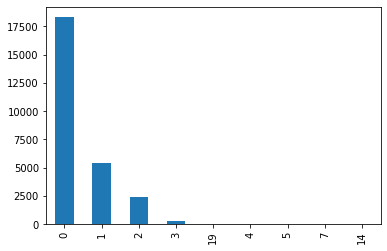

In [ ]:
train['child_num'].value_counts(sort=False).plot.bar()

In [ ]:
train.loc[train['child_num'] >= 2,'child_num']=2
test.loc[test['child_num']>=2, 'child_num']=2